In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_model(optimizer):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    return history

history_gd = train_model('sgd')
history_sgd = train_model('adam')

print("Gradient Descent Accuracy: {:.2f}%".format(accuracy_gd))
print("Stochastic Gradient Descent Accuracy: {:.2f}%".format(accuracy_sgd))

Gradient Descent Accuracy: 95.35%
Stochastic Gradient Descent Accuracy: 99.51%


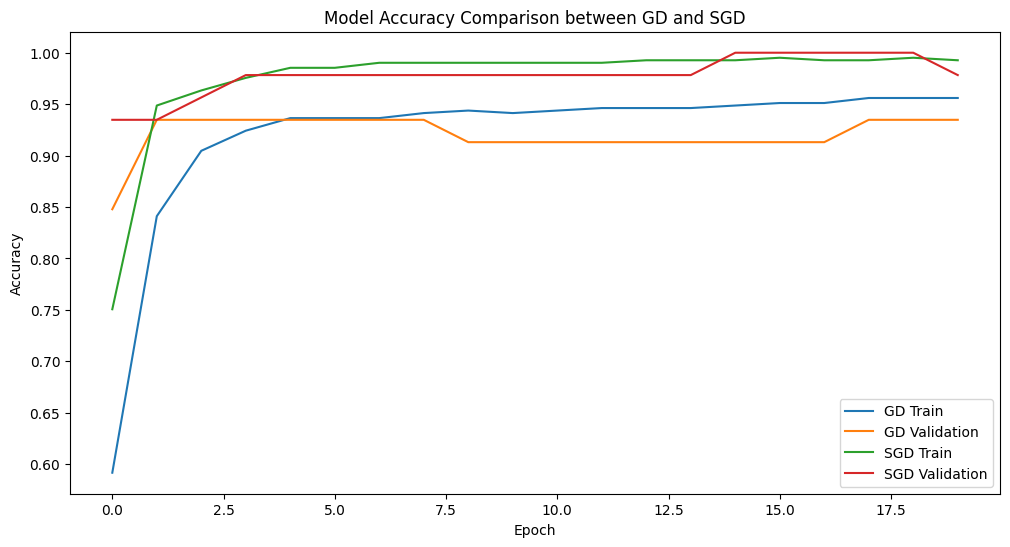

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(history_gd.history['accuracy'], label='GD Train')
plt.plot(history_gd.history['val_accuracy'], label='GD Validation')

plt.plot(history_sgd.history['accuracy'], label='SGD Train')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation')

plt.title('Model Accuracy Comparison between GD and SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()